In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-news-detection/true.csv
/kaggle/input/fake-news-detection/fake.csv


In [4]:
import pandas as pd
# Load the dataset
true = pd.read_csv('/kaggle/input/fake-news-detection/true.csv')
fake = pd.read_csv('/kaggle/input/fake-news-detection/fake.csv')

In [5]:
true['fake'] = 0
true.head()

,title,text,subject,date,fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [6]:
fake['fake'] = 1
fake.head()

,title,text,subject,date,fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [7]:
# Concatenate the true and fake dataset
news_data = pd.concat([true,fake])
news_data

,title,text,subject,date,fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [8]:
#Shuffling the dataset after concatenatig it to prevent the model from being biased.
from sklearn.utils import shuffle
shuffled_df = shuffle(news_data, random_state=42)
shuffled_df

,title,text,subject,date,fake
799,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",1
6500,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",1
3590,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",1
1377,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",0
11059,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",1
...,...,...,...,...,...
11284,Nigeria says U.S. agrees delayed $593 million ...,ABUJA (Reuters) - The United States has formal...,worldnews,"December 27, 2017",0
23315,Boiler Room #62 – Fatal Illusions,Tune in to the Alternate Current Radio Network...,Middle-east,"June 29, 2016",1
16741,ATHEISTS SUE GOVERNOR OF TEXAS Over Display on...,I m convinced the Freedom From Religion group...,Government News,"Feb 27, 2016",1
860,Republican tax plan would deal financial hit t...,WASHINGTON (Reuters) - The Republican tax plan...,politicsNews,"November 2, 2017",0


In [9]:
# Removing unwated columns
final_df = shuffled_df.drop(columns=['title','subject','date'], inplace=False)
final_df

,text,fake
799,"Donald Trump s White House is in chaos, and th...",1
6500,Now that Donald Trump is the presumptive GOP n...,1
3590,Mike Pence is a huge homophobe. He supports ex...,1
1377,SAN FRANCISCO (Reuters) - California Attorney ...,0
11059,Twisted reasoning is all that comes from Pelos...,1
...,...,...
11284,ABUJA (Reuters) - The United States has formal...,0
23315,Tune in to the Alternate Current Radio Network...,1
16741,I m convinced the Freedom From Religion group...,1
860,WASHINGTON (Reuters) - The Republican tax plan...,0


In [10]:
final_df.shape

(44898, 2)

In [11]:
# Append contents under the label and text column into lists
sentences = final_df['text'].tolist()
labels = final_df['fake'].tolist()
labels[0]

1

In [20]:
# Number of examples to use for training
training_size = 36000

# Vocabulary size of the tokenizer
vocab_size = 10000

# Maximum length of the padded sequences
max_length = 7402

# Output dimensions of the Embedding layer
embedding_dim = 16

In [21]:
# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


2024-02-12 22:30:11.783234: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-12 22:30:11.783290: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-12 22:30:11.784663: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [22]:
# Parameters for padding and OOV tokens
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length,truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [28]:
training_padded.shape

(36000, 7402)

In [29]:

embedding_dim = 64
lstm1_dim = 64
lstm2_dim = 64
dense_dim = 128

# Build the model
model = tf.keras.Sequential([ 
    tf.keras.layers.Embedding(vocab_size, embedding_dim,input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm2_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 7402, 64)          640000    
                                                                 
 bidirectional_6 (Bidirecti  (None, 7402, 128)         66048     
 onal)                                                           
                                                                 
 bidirectional_7 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 821505 (3.13 MB)
Trainable params: 82150

In [30]:
# Set the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

# Train the model
history = model.fit(training_padded, training_labels, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/10
282/282 [==============================] - 424s 1s/step - loss: 0.1095 - accuracy: 0.9521 - val_loss: 0.0317 - val_accuracy: 0.9921
Epoch 2/10
282/282 [==============================] - 414s 1s/step - loss: 0.0295 - accuracy: 0.9911 - val_loss: 0.0212 - val_accuracy: 0.9938
Epoch 3/10
282/282 [==============================] - 411s 1s/step - loss: 0.0074 - accuracy: 0.9981 - val_loss: 0.0250 - val_accuracy: 0.9938
Epoch 4/10
282/282 [==============================] - 409s 1s/step - loss: 0.0069 - accuracy: 0.9983 - val_loss: 0.0333 - val_accuracy: 0.9915
Epoch 5/10
282/282 [==============================] - 408s 1s/step - loss: 0.0280 - accuracy: 0.9906 - val_loss: 0.0357 - val_accuracy: 0.9912
Epoch 6/10
282/282 [==============================] - 407s 1s/step - loss: 0.0191 - accuracy: 0.9948 - val_loss: 0.0700 - val_accuracy: 0.9790
Epoch 7/10
282/282 [==============================] - 406s 1s/step - loss: 0.0934 - accuracy: 0.9716 - val_loss: 0.0598 - val_accuracy: 0.9817

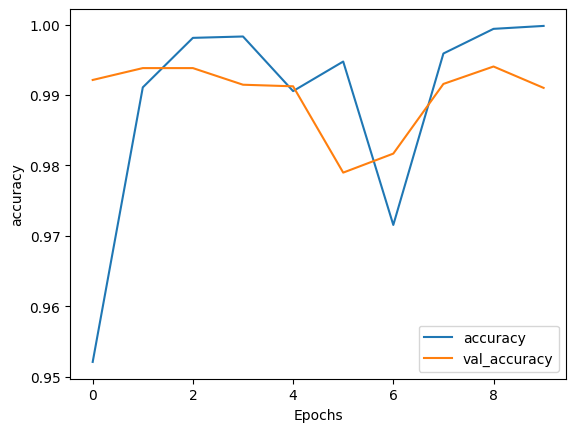

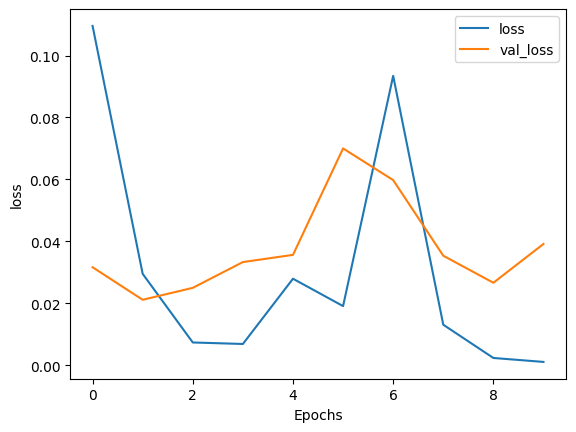

In [32]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")